In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import jieba
import jieba.analyse
from wordcloud import WordCloud
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head(1)

,url,daymoney,days,jobdescribe,lasting,location,title,...
0,http://www.shixiseng.com/intern/inn_mk6tnexobcsi,200-250/天 丨,5天/周\n\n丨,"职位诱惑： 大咖带教,下午茶,加班晚饭,快速成长 职位描述： 岗位职责 1、利用SQL和Ex...",实习7个月,上海 丨,报表开发实习生,{}


In [3]:
df = df.drop('...', 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 7 columns):
url            1058 non-null object
daymoney       1058 non-null object
days           1058 non-null object
jobdescribe    1058 non-null object
lasting        1057 non-null object
location       1058 non-null object
title          1058 non-null object
dtypes: object(7)
memory usage: 57.9+ KB


In [5]:
data = df.to_dict(orient ='index')

In [6]:
len(df)

1058

## 数据清洗

In [7]:
data[1]

{'daymoney': '100-140/天 丨',
 'days': '4天/周\n\n丨',
 'jobdescribe': '德勤管理咨询公司招募咨询实习生 1. 无论你是理工学霸，还是经管先锋，只要你立志于在管理咨询道路上走的更远，誓要把战略定位、组织设计、数据分析等企业经营管理的各个方面玩弄于鼓掌之间，德勤咨询的老司机们将会带你飞起来！ 2. 我们的业务：目前我们的咨询业务涉及汽车、能源、消费品、零售、金融、投资、电信、等各个行业领域。 3. 我们招聘什么岗位？ 工作职责： （1） 数据处理、分析与展示 （2） 数据仓库设计、开发与优化 （3） 数据模型建立与分析 （4） 资料收集、访谈记录等 （5） 行业研究、企业案例研究等 4. 你将收获什么？ 一个优秀的团队：这里每个人都“身怀绝技”！玩转Tableau的达人，画出高逼格PPT的大神，功底深厚的技术大咖，智慧与美貌并存的美女分析师。 一份独特的工作经历：你将与一群颜值超高的小伙伴一起共事，在自由包容的环境下，充分发挥你的才能！揭开黑匣子，深入了解咨询公司的工作内容，为行业巨头服务！你还能获得行业研究、业务分析、数据分析、项目管理等等全方位的学习锻炼！ 5. 我们希望你： （1） 积极主动 （2） 靠谱耐虐 （3） 思维开阔 （4） 有特长 （5） 长期稳定的实习时间 6. 申请要求 （1） 名校本科及以上学历，工科、信息技术、计算机及相关专业优先 （2） 有咨询公司实习经验者优先 （3） 具有较强的逻辑思维及快速学习能力 （4） 近期入职，工作时间需确保至少4天/周，持续5-6个月 7. 工作地点：北京 8. 工资薪酬：140元/天 9. 到岗时间：ASAP',
 'lasting': '实习6个月',
 'location': '北京 丨',
 'title': '大数据实习生',
 'url': 'http://www.shixiseng.com/intern/inn_kicylmcvvg6e'}

In [8]:
#根据实习标题和内容筛选掉非数据分析师类的实习
keywords = ["数据分析"] #可以调整
real_data = []
for job in data:
    for keyword in keywords:
        if data[job]["title"].find(keyword)>0 or data[job]["jobdescribe"].find(keyword)>0:
        #if keyword in data[job]["title"] or data[job]["jobdescribe"]:
            if data[job] not in real_data:
                real_data.append(data[job])

In [9]:
len(real_data) #清洗过后的数值

360

In [10]:
real_data[0]["daymoney"] #观察日薪结构

'200-250/天 丨'

In [11]:
# 调整日薪结构，取平均值，如果写的是面议，就改成None.(只能执行一次，第二次执行会把所有money值清零)
for i in range(len(real_data)):
    try:
        money_range = real_data[i]["daymoney"].split('/')[0].split('-')
        real_data[i]["daymoney"] = (int(money_range[0]) + int(money_range[1])) / 2
    except Exception:
        real_data[i]["daymoney"] = None

In [12]:
real_data[0]

{'daymoney': 225.0,
 'days': '5天/周\n\n丨',
 'jobdescribe': '职位诱惑： 大咖带教,下午茶,加班晚饭,快速成长 职位描述： 岗位职责 1、利用SQL和Excel协助完成公司日常业务报表的编制、维护和优化； 2、协助负责收集公司各部门的数据需求，并提炼总结出可执行的数据语言； 3、参与各种与数据分析相关的项目工作。 岗位要求 1、全日制本科及以上学历； 2、备良好的数据敏感性，学习能力强，工作认真，有责任心； 3、熟悉常用数据库如SQL Server\\MySql； 4、最最重要的是：踏实、细心',
 'lasting': '实习7个月',
 'location': '上海 丨',
 'title': '报表开发实习生',
 'url': 'http://www.shixiseng.com/intern/inn_mk6tnexobcsi'}

In [13]:
# 调整每周到岗天数 
for i in range(len(real_data)):
    try:
        real_data[i]["days"] = int(real_data[i]["days"][0])
    except:
        pass

In [14]:
# 调整持续时间，以月为单位
for i in range(len(real_data)): 
    real_data[i]["lasting"] = int(real_data[i]["lasting"][2])

In [15]:
# 调整坐标数据
for i in range(len(real_data)): 
    real_data[i]["location"] = real_data[i]["location"].split(' ')[0]

In [16]:
real_data[0]

{'daymoney': 225.0,
 'days': 5,
 'jobdescribe': '职位诱惑： 大咖带教,下午茶,加班晚饭,快速成长 职位描述： 岗位职责 1、利用SQL和Excel协助完成公司日常业务报表的编制、维护和优化； 2、协助负责收集公司各部门的数据需求，并提炼总结出可执行的数据语言； 3、参与各种与数据分析相关的项目工作。 岗位要求 1、全日制本科及以上学历； 2、备良好的数据敏感性，学习能力强，工作认真，有责任心； 3、熟悉常用数据库如SQL Server\\MySql； 4、最最重要的是：踏实、细心',
 'lasting': 7,
 'location': '上海',
 'title': '报表开发实习生',
 'url': 'http://www.shixiseng.com/intern/inn_mk6tnexobcsi'}

## 数据探索

In [17]:
#转回pandas格式
data_dic = {}
for i in range(len(real_data)): 
    data_dic[i] = real_data[i]
data_frame = pd.DataFrame.from_dict(data_dic, orient='index')

In [18]:
data_frame.head()

,url,daymoney,days,jobdescribe,lasting,location,title
0,http://www.shixiseng.com/intern/inn_mk6tnexobcsi,225.0,5,"职位诱惑： 大咖带教,下午茶,加班晚饭,快速成长 职位描述： 岗位职责 1、利用SQL和Ex...",7,上海,报表开发实习生
1,http://www.shixiseng.com/intern/inn_kicylmcvvg6e,120.0,4,德勤管理咨询公司招募咨询实习生 1. 无论你是理工学霸，还是经管先锋，只要你立志于在管理咨询...,6,北京,大数据实习生
2,http://www.shixiseng.com/intern/inn_chueugs32frf,115.0,5,招聘条件 ： 1．在校本科生，硕士生，博士生。统计学、生物统计学、生物信息学、基因学相关专业...,6,深圳,生物统计实习生
3,http://www.shixiseng.com/intern/inn_cdg0etqkgdxg,175.0,4,工作职责： 1、 协助主管完善推进相关重点工作项目； 2、 协助主管进行数据审核，能通过数据...,6,深圳,业务实习生(J14511)
4,http://www.shixiseng.com/intern/inn_nvs2kqargwmk,125.0,4,岗位职责： 1、负责全站流量各指标项目的数据分析 2、针对PC、M及APP等方向异常行为进行...,3,北京,数据分析实习生


### 每周至少到岗时间

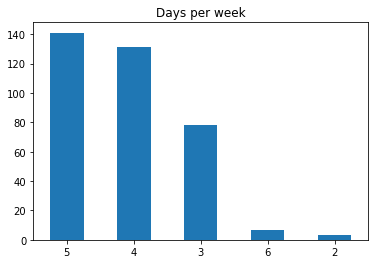

In [19]:
days = pd.Series.value_counts(data_frame["days"])
my_plot = days.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Days per week')

### 至少持续实习时长（月）

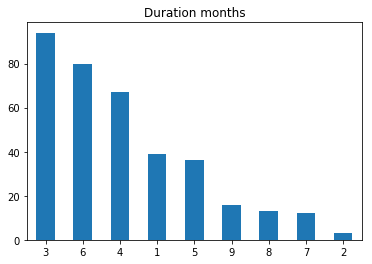

In [20]:
lasting = pd.Series.value_counts(data_frame["lasting"])
my_plot = lasting.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Duration months')

### 日薪分布

In [21]:
data = [go.Histogram(x=data_frame["daymoney"].dropna())]
layout = go.Layout(
    title='数据分析实习生日薪分布情况',
    xaxis=dict(
        title='日薪/元',
        tickwidth=4,
        dtick=25
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Money per day')

### 岗位城市分布

In [22]:
#因为发现有些岗位是多地，所以不能直接计算计数值，所以要对这部分数据再处理一下
location_dict = data_frame[["location","daymoney"]].to_dict()

In [23]:
new_dict = {}
for i in range(len(location_dict["location"])):
    if len(location_dict["location"][i]) > 1:
        cities = location_dict["location"][i].split(',')
        for city in cities:
            if city not in new_dict:
                new_dict[city] = {}
                new_dict[city]["money"] = [location_dict["daymoney"][i]]
                new_dict[city]["count"] = 1
            else:
                new_dict[city]["count"] += 1
                new_dict[city]["money"].append(location_dict["daymoney"][i])
    else:
        if city not in new_dict:
            new_dict[city] = {}
            new_dict[city]["money"] = [location_dict["daymoney"][i]]
            new_dict[city]["count"] = 1
        else:
            new_dict[city]["count"] += 1
            new_dict[city]["money"].append(location_dict["daymoney"][i])

In [24]:
a = [(city,new_dict[city]["count"],new_dict[city]["money"]) for city in new_dict]
a.sort(key=lambda x: x[1],reverse=True)

In [25]:
city = [a[i][0] for i in range(18)] #选取前二十的城市
count = [a[i][1] for i in range(18)]

In [26]:
data = [go.Bar(
            x=city,
            y=count
    )]

layout = go.Layout(
    title='实习岗位所在城市分布',
    xaxis=dict(
        title='城市'
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='city_basic-bar')

In [27]:
traces = []
x_data = [a[i][0] for i in range(8)] #选取前十的城市
y_data = [a[i][2] for i in range(8)]
for xd, yd in zip(x_data, y_data):
    traces.append(go.Box(
            y=yd,
        name = xd
            ))

layout = go.Layout(
    title='不同城市日薪水平',
    xaxis=dict(
        title='城市'
    ),
    yaxis=dict(
        title='日薪/元'
    )
)

fig = go.Figure(data=traces,layout=layout)
py.iplot(fig)

## 技能关键词

In [28]:
def keywords(text):
    key = jieba.analyse.extract_tags(text, topK=30, withWeight=False, allowPOS=())
    return key

data_frame['keywords'] = data_frame['jobdescribe'].apply(keywords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\CLARKY~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.822 seconds.
Prefix dict has been built succesfully.


In [29]:
text = ''
for word_list in data_frame['keywords']:
    for word in word_list:
        text = text + ',' + word

In [30]:
a = text.encode('gbk').decode('gbk','ignore') #中文编码用GBK

In [31]:
with open('stop_word.txt') as f:
    stop_words = f.read().splitlines() #载入stop_word字典，可以自行设置

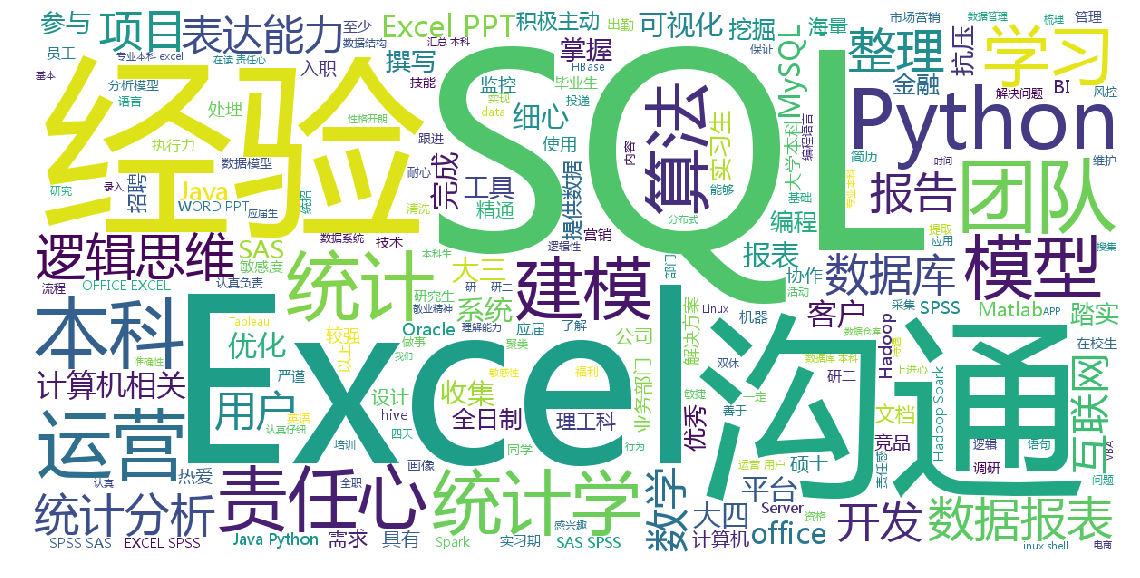

In [32]:
wordcloud = WordCloud(   
                            font_path='msyh.ttf',
                            background_color='white',
                          width=1200,
                          height=600,
                            stopwords=stop_words
                         ).generate(a)



plt.figure(figsize = (20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()